In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline
import os
import json
os.environ["PUIDATA"] = "%s//Desktop/PUI/PUIDATA"%os.getenv("HOME")

Populating the interactive namespace from numpy and matplotlib


# IDEA:
## People who have taken short-term passes(customers) tend to ride the bike longer than ones with long-term passes(subscribers)
# NULL HYPOTHESIS:
## The average duration of trips taken by subscribers is _the same_ or _higher_  than the average duration of trips taken by customers
# ALTERNATE HYPOTHESIS:
## The average duration of trips taken by consumers is _higher_  than the average duration of trips taken by subscribers

# _$H_0$_ : ${S_{\mathrm{average}}} >= {C_{\mathrm{average}}}$
# _$H_1$_ : ${C_{\mathrm{average}}} > {S_{\mathrm{average}}}$


## The significance level I will choose is  $\alpha=0.05$. i.e. 95% confidence level.


In [2]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    # Check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # iIf yes just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA")) 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])

In [5]:
df.head(15)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12
5,332,1/1/2016 00:01:19,1/1/2016 00:06:51,3104,Kent Ave & N 7 St,40.720577,-73.961502,389,Broadway & Berry St,40.710446,-73.965251,15788,Subscriber,1984.0,1,2016-01-01 00:01:19
6,2321,1/1/2016 00:01:27,1/1/2016 00:40:08,3167,Amsterdam Ave & W 73 St,40.779668,-73.980930,3164,Columbus Ave & W 72 St,40.777057,-73.978985,24183,Subscriber,1963.0,1,2016-01-01 00:01:27
7,694,1/1/2016 00:02:18,1/1/2016 00:13:53,268,Howard St & Centre St,40.719105,-73.999733,497,E 17 St & Broadway,40.737050,-73.990093,15747,Subscriber,1996.0,1,2016-01-01 00:02:18
8,1376,1/1/2016 00:03:12,1/1/2016 00:26:09,527,E 33 St & 2 Ave,40.744023,-73.976056,259,South St & Whitehall St,40.701221,-74.012342,23933,Subscriber,1963.0,1,2016-01-01 00:03:12
9,615,1/1/2016 00:03:43,1/1/2016 00:13:59,432,E 7 St & Avenue A,40.726218,-73.983799,311,Norfolk St & Broome St,40.717227,-73.988021,23993,Subscriber,1971.0,1,2016-01-01 00:03:43


In [6]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [7]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year','gender','date'], axis=1, inplace=True)

In [8]:
df.head(15)

,tripduration,usertype
0,923,Subscriber
1,379,Subscriber
2,589,Subscriber
3,889,Subscriber
4,1480,Subscriber
5,332,Subscriber
6,2321,Subscriber
7,694,Subscriber
8,1376,Subscriber
9,615,Subscriber


In [9]:
df['tripduration'].min()

61

tripduration    2468.593245
dtype: float64

In [16]:
Sub.head()

,tripduration,usertype
0,923,Subscriber
1,379,Subscriber
2,589,Subscriber
3,889,Subscriber
4,1480,Subscriber


In [11]:
df.head()

,tripduration,usertype
0,923,Subscriber
1,379,Subscriber
2,589,Subscriber
3,889,Subscriber
4,1480,Subscriber


Text(0.5,1,'Distribution of time duration for trips')

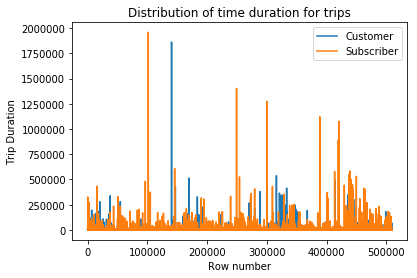

In [12]:
(df.groupby("usertype")['tripduration']).plot()
pl.legend()
pl.xlabel("Row number")
pl.ylabel("Trip Duration")
pl.title("Distribution of time duration for trips")

### Figure 1: Trip Durations grouped by the usertype.

Text(0.5,1,'Distribution of time duration for trips without outliers')

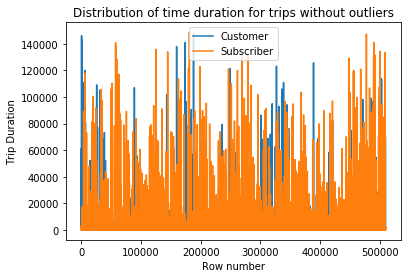

In [13]:
df[df["tripduration"] < 150000].groupby("usertype")['tripduration'].plot(y='index')
pl.legend()
pl.xlabel("Row number")
pl.ylabel("Trip Duration")
pl.title("Distribution of time duration for trips without outliers")

### Figure 2: Removing unreasonably high Trip Durations(outliers) and replotting them grouped by the usertype to get a slightly better view of the distribution

Text(0.5,1,'Average Trip Duration')

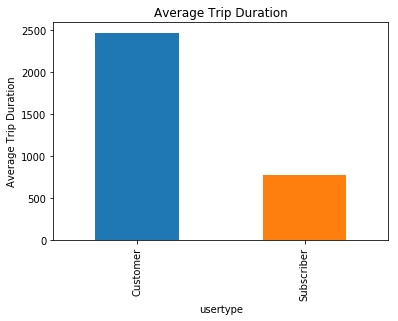

In [14]:
df.groupby("usertype")['tripduration'].mean().plot(kind='bar')
pl.ylabel("Average Trip Duration")
pl.title("Average Trip Duration")

### Figure 3: The average trip duration of customers and subscribers.

# Homework 8 (Project continued)

### I will now perform the Welch's t-test opposed to the 2 groups Mann-Whitney test suggested by Marvin because it is the ideal test to be done when comparing the means of 2 samples and here, the variances are unequal.

In [15]:
from scipy import stats

In [21]:
Sub = (df[df.usertype=='Subscriber']['tripduration'])
Cust = (df[df.usertype=='Customer']['tripduration'])

In [38]:
np.var(Cust)

301926864.0410866

In [39]:
np.var(Sub)

42063414.006975204

As you can see, the variances are significantly different.

In [40]:
# sm = (Sub.mean())
# cm = (Cust.mean())

In [41]:
tstat,pval = stats.ttest_ind(Cust,Sub,equal_var=False)

#### The p-value should be less than alpha = 0.05 and the t-statistic should be greater than t_critical = 6.314(from the critical t-value calculation table) in order to reject the null hypothesis.
#### This is a one-tailed test and so, the p-value needs to be divided into 2.

In [44]:
pval_onetail = pval/2
t_critical = 6.314
alpha = 0.05

In [47]:
if(tstat>t_critical and pval_onetail<alpha):
    print('The null hypothesis is rejected with confidence level greater than 95%!')
else:
    print('The null holds!')

The null hypothesis is rejected with confidence level greater than 95%!


So, the idea that people who have taken short-term passes(customers) tend to ride the bike longer than ones with long-term passes(subscribers) turns out to be true.